In [1]:
import pandas as pd
import glob
import plotly.express as px
import matplotlib.pyplot as plt


## Ausplot sites

In [2]:
base_path = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/130 Enhancing Fractional Cover Models Using Hyperspectral Data/4.1 Executing –  Working documents/hyperspec-fc-data/'

In [3]:
site_summary_file = f'{base_path}/TERN_EcoPlots/ausplot_site_summary_16042025.csv'
site_summary = pd.read_csv(site_summary_file)


In [4]:
site_summary.head()

,site_unique,site_location_name,established_date,description,bioregion_name,landform_pattern,landform_element,site_slope,site_aspect,comments,...,a_s_c,plot_is_100m_by_100m,plot_is_aligned_to_grid,plot_is_permanently_marked,latitude,longitude,point,state,visit_date,visit_number
0,NSABBS0001-58580,NSABBS0001,2018-05-11T10:11:00,"Warrumbungle National Park, 28.8km west of Coo...",BBS,HIL,FAN,3,45,Lower bottom slope of the range. 3 degree slop...,...,NaN,True,True,True,-31.281189,148.976552,SW,NSW,2018-05-11,1
1,NSABBS0002-58555,NSABBS0002,2018-05-12T13:41:09,Warrumbungle National Park. 893m north west of...,BBS,HIL,HSL,6,45,The Landform element is a hill slope with a pa...,...,NaN,True,True,True,-31.279453,148.992461,SW,NSW,2018-05-12,1
2,NSABBS0003-58581,NSABBS0003,2018-05-13T11:11:00,Pilliga State Conservation Area. 56.8km north ...,BBS,PLA,PLA,0,NaN,Site is flat. No surface strew or lithology ap...,...,NaN,True,False,True,-30.454647,149.226828,SW,NSW,2018-05-13,1
3,NSABBS0004-58556,NSABBS0004,2018-05-14T11:40:15,Pilliga State Conservation Area. 53.7km south ...,BBS,PLA,PLA,0,NaN,Landform element is a plain and pattern plain....,...,NaN,True,False,True,-30.460964,149.246894,SW,NSW,2018-05-14,1
4,NSABBS0005-58582,NSABBS0005,2018-05-15T12:06:00,Pilliga State Conservation Area. 52km south we...,BBS,PLA,PLA,0,NaN,The plot is inside Australian Wildlife Conserv...,...,NaN,True,False,True,-30.498783,149.279986,SW,NSW,2018-05-15,1


In [5]:
site_summary.nunique()

site_unique                   1003
site_location_name             787
established_date               699
description                    753
bioregion_name                  61
landform_pattern                17
landform_element                23
site_slope                      29
site_aspect                     51
comments                       779
outcrop_lithology               30
other_outcrop_lithology         20
plot_dimensions                 10
site_location_visit_id        1003
visit_start_date               903
visit_end_date                 902
visit_notes                    477
location_description           957
erosion_type                    11
erosion_abundance                7
erosion_state                    5
microrelief                     26
drainage_type                    7
disturbance                     10
climatic_condition               3
vegetation_condition             8
observer_veg                    28
observer_soil                   21
described_by        

In [6]:
site_summary[site_summary.state=='VIC']['site_location_name']

781    VCAAUA0001
782    VCAAUA0002
783    VCAAUA0003
784    VCAAUA0004
785    VCAAUA0005
786    VCAAUA0006
787    VCAAUA0007
788    VCAAUA0008
789    VCAAUA0009
790    VCAAUA0010
791    VCAAUA0011
792    VCAAUA0012
793    VCAAUA0013
794    VCAAUA0014
795    VCAAUA0015
796    VCAMDD0001
797    VCAMDD0002
798    VCAMDD0003
Name: site_location_name, dtype: object

In [7]:
soil_files = glob.glob(f"{base_path}/soil_spectra/*/*/*/TERN*.CSV")
len(soil_files)

20

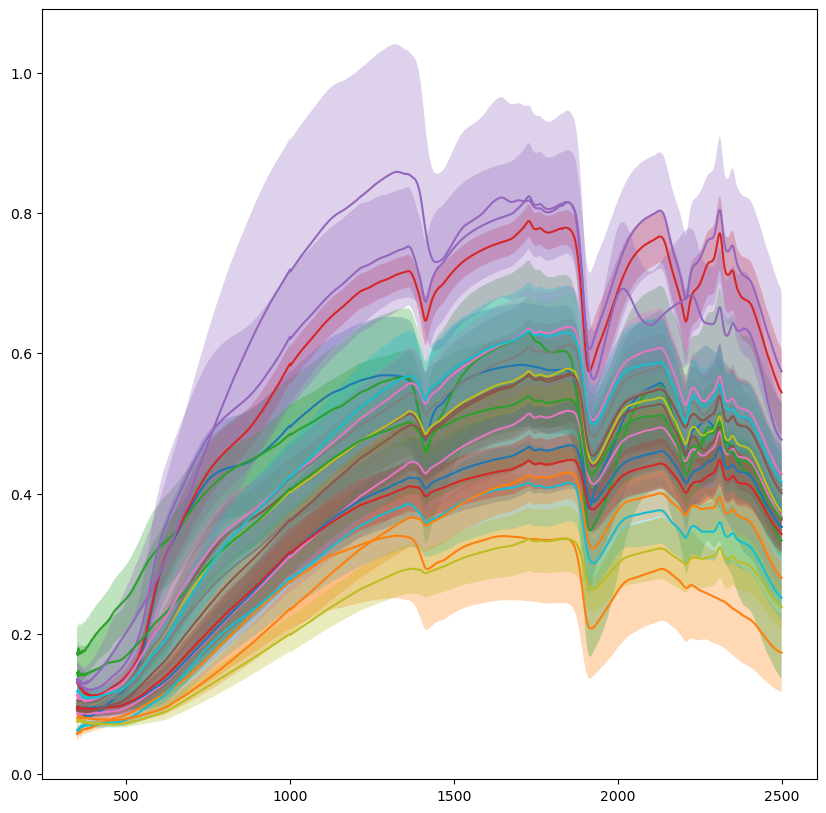

In [8]:
plt.figure(figsize=(10, 10))

for f in soil_files:
    df = pd.read_csv(f, sep='\s+')
    site_name = f.split('/')[-2]
    # Melt the dataframe to have 'Wavelength' and 'Reflectance' in long format
    df_melted = df.melt(id_vars=['Wavelength'], var_name='Sample', value_name='Reflectance')
    mean = df_melted.groupby('Wavelength').Reflectance.mean()
    std = df_melted.groupby('Wavelength').Reflectance.std()
    
    plt.plot(mean.index, mean, label=site_name)
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

#plt.legend(loc='right')
    # Create the plot
    #px.line(df_melted, x='Wavelength', y='Reflectance', color='Sample', title=f'{site_name}')

In [11]:
#NSANSS0002 - NSW
NSANSS_latlong = 148.32397997,-32.83522996
path_NSANSS0002 = f"{base_path}/soil_spectra/New South Wales/NSANSS/NSANSS0002/TERN_2019_03_04_merged.csv"

# Read the CSV file with space as the delimiter
df_NSANSS0002 = pd.read_csv(path_NSANSS0002, delim_whitespace=True)

# Display the first few rows of the dataframe
df_NSANSS0002.head()


/var/folders/20/1jhcj5794rq6bfzc4mnnx51r0000gp/T/ipykernel_2643/1268414949.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_NSANSS0002 = pd.read_csv(path_NSANSS0002, delim_whitespace=True)


,Wavelength,NSANSS000200001.asd.sco,NSANSS000200002.asd.sco,NSANSS000200003.asd.sco,NSANSS000200004.asd.sco,NSANSS000200005.asd.sco,NSANSS000200006.asd.sco,NSANSS000200007.asd.sco,NSANSS000200008.asd.sco,NSANSS000200009.asd.sco,...,NSANSS000200015.asd.sco,NSANSS000200016.asd.sco,NSANSS000200017.asd.sco,NSANSS000200018.asd.sco,NSANSS000200019.asd.sco,NSANSS000200020.asd.sco,NSANSS000200021.asd.sco,NSANSS000200022.asd.sco,NSANSS000200023.asd.sco,NSANSS000200024.asd.sco
0,350,0.090491,0.091285,0.118075,0.080813,0.099197,0.087238,0.107733,0.078302,0.091421,...,0.085987,0.088254,0.072204,0.098570,0.070335,0.063050,0.065363,0.071356,0.084471,0.087520
1,351,0.094936,0.094794,0.113841,0.078147,0.090494,0.092552,0.103547,0.077064,0.087342,...,0.079981,0.087655,0.069320,0.097518,0.073027,0.070593,0.066720,0.074132,0.090981,0.084095
2,352,0.092539,0.089776,0.113608,0.077140,0.084640,0.088209,0.101158,0.077518,0.087290,...,0.086904,0.085718,0.069628,0.100139,0.067596,0.063423,0.065799,0.072279,0.087320,0.082863
3,353,0.089904,0.088048,0.112545,0.075002,0.082899,0.084092,0.102449,0.078016,0.086520,...,0.090295,0.085042,0.068633,0.101961,0.066335,0.058756,0.066560,0.070784,0.084000,0.081044
4,354,0.091746,0.095520,0.109451,0.073090,0.084347,0.087307,0.107106,0.077636,0.084011,...,0.082453,0.085483,0.065262,0.100371,0.072948,0.064396,0.068929,0.072733,0.086664,0.077148


In [12]:
fig=px.line(df_melted, x='Wavelength', y='Reflectance', color='Sample', title=f'{site_name}')
fig.show()

In [14]:
#NSTNSS0001 - NSW
NSTNSS_latlong = 148.32397997,-32.83522996
path_NSTNSS = f"{base_path}/soil_spectra/New South Wales/NSTNSS/NSTNSS0001/TERN_2019_03_04_merged.csv"

# Read the CSV file with space as the delimiter
df_NSTNSS0001 = pd.read_csv(path_NSTNSS, delim_whitespace=True)

# Display the first few rows of the dataframe
df_NSTNSS0001.head()

/var/folders/20/1jhcj5794rq6bfzc4mnnx51r0000gp/T/ipykernel_2643/958125248.py:6: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



,Wavelength,NSTNSS000100001.asd.sco,NSTNSS000100002.asd.sco,NSTNSS000100003.asd.sco,NSTNSS000100004.asd.sco,NSTNSS000100005.asd.sco,NSTNSS000100006.asd.sco,NSTNSS000100007.asd.sco,NSTNSS000100008.asd.sco,NSTNSS000100009.asd.sco,NSTNSS000100010.asd.sco,NSTNSS000100011.asd.sco,NSTNSS000100012.asd.sco,NSTNSS000100013.asd.sco
0,350,0.086090,0.100561,0.100817,0.112510,0.110340,0.091105,0.114389,0.133250,0.089917,0.099074,0.154076,0.134162,0.081899
1,351,0.088837,0.104041,0.107574,0.120283,0.118922,0.093307,0.121207,0.125044,0.103273,0.100515,0.159293,0.138775,0.090171
2,352,0.096214,0.102585,0.111106,0.112265,0.117671,0.091627,0.123547,0.125776,0.102298,0.093034,0.152740,0.138496,0.082765
3,353,0.099564,0.103656,0.108474,0.105087,0.113157,0.090509,0.121615,0.134251,0.097645,0.088821,0.149252,0.139103,0.082155
4,354,0.095070,0.109627,0.101534,0.108477,0.111674,0.091547,0.118429,0.141528,0.098239,0.092885,0.155493,0.142847,0.095595
